In [89]:
## This notebook is an investigation of different data sets/data types with regards to 
## Monitoring Living Shorelines

In [90]:
## Importing Libraries 
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import cartopy.crs as ccrs


In [91]:
# Read a shapefile of NYC's shoreline. This data set was retrieved from (Insert Link)

local_path = "/Users/kenneth/Documents/Living_Shorelines/data/nyc_gov_shoreline/nyc_shoreline.shp" #This is where the copy of the remote repository was cloned onto the local computer(varies from user to user)

nyc_shoreline = gpd.read_file(local_path) # reading the data and storing it as a geopandas dataframe 

DriverError: Unable to open /Users/kenneth/Documents/Living_Shorelines/data/nyc_gov_shoreline/nyc_shoreline.shx or /Users/kenneth/Documents/Living_Shorelines/data/nyc_gov_shoreline/nyc_shoreline.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [ ]:
# creating a simple plot of the geopandas dataframe 
nyc_shoreline.info()

In [ ]:
nyc_shoreline.head(1)

In [ ]:
##importing data from census to look at census tracts 
## https://www.nyc.gov/site/planning/data-maps/open-data.page#census
file_path = "/Users/kenneth/Documents/Living_Shorelines/data/census_tracts_2020/nyct2020.shp"
nyc_census_tracts = gpd.read_file(file_path)

In [ ]:
## cleaning data, selecting only columns of interest and converting data types to 
## the desired types 
nyc_census_tracts = nyc_census_tracts[['BoroName','GEOID','geometry']]
nyc_census_tracts['GEO_ID'] = nyc_census_tracts['GEOID'].astype(int)

In [ ]:
## creating a mask that marks the row as true if the value in the boro name column is manhattan
##applying the mask onto the entire dataframe-- this will select only the manhattan rows
##plotting the census tracts 
mask = nyc_census_tracts['BoroName'] == 'Manhattan'
manhattan = nyc_census_tracts.loc[mask]
manhattan.plot()

In [ ]:
## Importing data from American Community Survey for Per Capita Income(future work, left on 07/10/23)
## https://www.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page

In [ ]:
## Importing poverty/POPULATION data from American Community Survey(Census tract data 2021)
file_path = "/Users/kenneth/Documents/Living_Shorelines/data/census_tracts_2020/socioeconomic_data/2021_B17001.csv"
nyc_poverty = pd.read_csv(file_path, low_memory=False)

In [ ]:
## cleaning the data so that we only have GEO_ID, poverty, and population data columns
## Dropping first row of data as it is metadata/extra titles 

nyc_poverty = nyc_poverty[['GEO_ID','B17001_001E','B17001_002E']] # selecting on columns of interest
nyc_poverty = nyc_poverty.iloc[1: , :] # dropping first row 
nyc_poverty['B17001_001E'] = nyc_poverty['B17001_001E'].astype(int) # turning column into intergers 
nyc_poverty['B17001_002E'] = nyc_poverty['B17001_002E'].astype(int) # turning column into intergers 
nyc_poverty['GEO_ID'] = nyc_poverty['GEO_ID'].apply(lambda x: x[9:]) #dropping country code from GEOID
nyc_poverty['GEO_ID'] = nyc_poverty['GEO_ID'].astype(int) # turning column into intergers 

nyc_poverty.info()

In [ ]:
nyc_poverty.head()

In [ ]:
## lets create a poverty ratio index(ie what percentage of the population is living 
## in poverty)

nyc_poverty['percent_poverty'] = (nyc_poverty['B17001_002E'] / nyc_poverty['B17001_001E']) * 100

In [ ]:
## merging the poverty dataframe with the census tract geodataframe
## this will allow us to access the poverty data geospatially 
nyc_poverty_gpd =  pd.merge(
    left = nyc_census_tracts,
    right = nyc_poverty,
    how="inner",
    on='GEO_ID')

In [ ]:
nyc_poverty_gpd.plot("percent_poverty", cmap="brg", legend = True) 

In [ ]:
def boro_plotter(gpd, boro):
    mask2 = gpd['BoroName'].eq(boro)
    boro_to_be_plotted = gpd.loc[mask2]
    boro_to_be_plotted.plot("percent_poverty", cmap="brg", legend=True)

In [ ]:
boro_plotter(gpd=nyc_poverty_gpd, boro = 'Brooklyn')

In [ ]:
## Vulnerability Mapping

In [ ]:
##importing data from census to look at census tracts 
## https://www.nyc.gov/site/planning/data-maps/open-data.page#census
#file_path = "/Users/kenneth/Downloads/wastewater_treatment_plants/wastewater_treatment_plants.shp"
#test = gpd.read_file(file_path)

In [ ]:
## Importing vulnerabilty data from CDC
## https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/SVI_documentation_2020.html
file_path = "/Users/kenneth/Documents/Living_Shorelines/data/census_tracts_2020/socioeconomic_data/vulnerability.csv"
nyc_vuln = pd.read_csv(file_path, low_memory=False)

In [66]:
## selecting columns of interest and
## turning -999 values into NAN values because -999 
## According to the documentation: https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/SVI_documentation_2020.html
## "For tracts with > 0 TOTPOP, a value of -999 in any field either means the value was unavailable 
## from the original census data or we could not calculate a derived value because of unavailable census data."
nyc_vuln = nyc_vuln[['COUNTY', 'FIPS', 'RPL_THEME1','RPL_THEME2','RPL_THEME3','RPL_THEME4','RPL_THEMES']]
nyc_vuln.loc[nyc_vuln2['RPL_THEMES'] == -999, 'RPL_THEMES'] = np.nan
nyc_vuln.loc[nyc_vuln2['RPL_THEME1'] == -999, 'RPL_THEME1'] = np.nan
nyc_vuln.loc[nyc_vuln2['RPL_THEME2'] == -999, 'RPL_THEME2'] = np.nan
nyc_vuln.loc[nyc_vuln2['RPL_THEME3'] == -999, 'RPL_THEME3'] = np.nan


In [67]:
## lets try to merge with the NYC shapefile!
## This will allow us to access the vulnerabilty data within a geopandas dataframe object 

nyc_vuln_gpd = pd.merge(nyc_census_tracts, nyc_vuln, left_on='GEO_ID', right_on='FIPS')

In [ ]:
## modifying boro plotting function so that I can decide what variable to plot now that the data has multiple variables
def boro_plotter2(gpd, boro, var):
    mask2 = gpd['BoroName'].eq(boro)
    boro_to_be_plotted = gpd.loc[mask2]
    boro_to_be_plotted.plot(var, cmap="brg", legend=True)

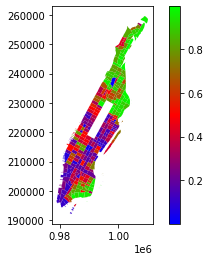

In [69]:
boro_plotter2(gpd = nyc_vuln_gpd, boro = 'Manhattan', var = 'RPL_THEMES' )

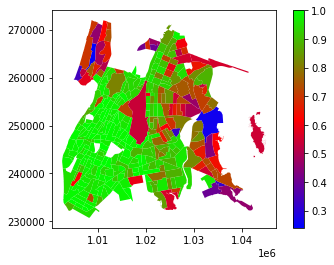

In [87]:
boro_plotter2(gpd = nyc_vuln_gpd, boro = 'Bronx', var = 'RPL_THEMES' )

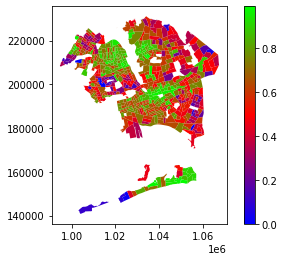

In [71]:
boro_plotter2(gpd = nyc_vuln_gpd, boro = 'Queens', var = 'RPL_THEMES' )

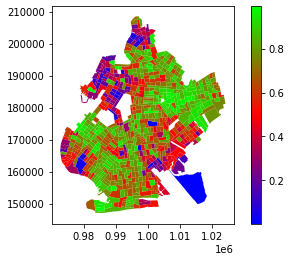

In [80]:
boro_plotter2(gpd = nyc_vuln_gpd, boro = 'Brooklyn', var = 'RPL_THEMES' )

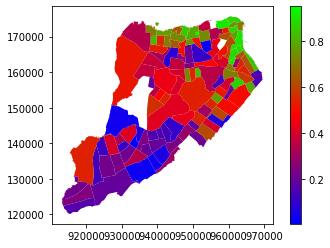

In [81]:
boro_plotter2(gpd = nyc_vuln_gpd, boro = 'Staten Island', var = 'RPL_THEMES' )

<AxesSubplot:>

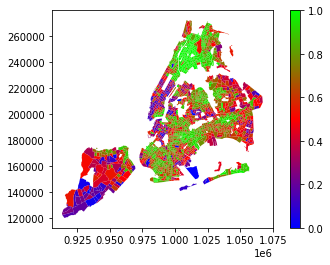

In [82]:
nyc_vuln_gpd.plot("RPL_THEMES", cmap="brg", legend = True) 